[View in Colaboratory](https://colab.research.google.com/github/santhavathi/Deep-Learning-MLBLR/blob/master/DNN_Final.ipynb)

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.utils import np_utils
from keras.optimizers import SGD

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


(60000, 28, 28)


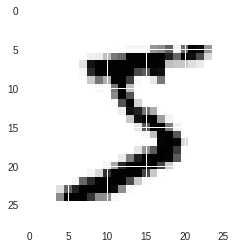

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', dilation_rate=2, input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Convolution2D(16, 3, 3, activation='relu', dilation_rate=2))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", dilation_rate=2, input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", dilation_rate=2)`
  import sys


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 24, 24, 32)        320       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 8, 8, 16)          4624      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 4, 4, 10)          170       
__________

In [0]:
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 41s 677us/step - loss: 0.3677 - acc: 0.8827
Epoch 2/10
18368/60000 [========>.....................] - ETA: 27s - loss: 0.1432 - acc: 0.9545

60000/60000 [==============================] - 40s 659us/step - loss: 0.1332 - acc: 0.9590
Epoch 3/10
32064/60000 [===============>..............] - ETA: 18s - loss: 0.1097 - acc: 0.9659

60000/60000 [==============================] - 39s 658us/step - loss: 0.1063 - acc: 0.9673
Epoch 4/10
38048/60000 [==================>...........] - ETA: 14s - loss: 0.0942 - acc: 0.9706

60000/60000 [==============================] - 40s 663us/step - loss: 0.0942 - acc: 0.9705
Epoch 5/10
40448/60000 [===================>..........] - ETA: 12s - loss: 0.0864 - acc: 0.9745

60000/60000 [==============================] - 40s 659us/step - loss: 0.0867 - acc: 0.9735
Epoch 6/10
42048/60000 [====================>.........] - ETA: 11s - loss: 0.0791 - acc: 0.9745

60000/60000 [==============================] - 39s 654us/step - loss: 0.0807 - acc: 0.9742
Epoch 7/10
42528/60000 [====================>.........] - ETA: 11s - loss: 0.0775 - acc: 0.9758

60000/60000 [==============================] - 39s 655us/step - loss: 0.0757 - acc: 0.9766
Epoch 8/10
43104/60000 [====================>.........] - ETA: 11s - loss: 0.0716 - acc: 0.9775

60000/60000 [==============================] - 39s 653us/step - loss: 0.0742 - acc: 0.9770
Epoch 9/10
43488/60000 [====================>.........] - ETA: 10s - loss: 0.0683 - acc: 0.9793

60000/60000 [==============================] - 39s 649us/step - loss: 0.0684 - acc: 0.9790
Epoch 10/10
40128/60000 [===================>..........] - ETA: 14s - loss: 0.0719 - acc: 0.9775

60000/60000 [==============================] - 42s 693us/step - loss: 0.0706 - acc: 0.9780


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.0344324719496537, 0.9884]
